<a href="https://colab.research.google.com/github/mfaria-p/Machine_learning_intro/blob/main/Classify_querties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#put the data in tensors
**torch.tensor(data_np)**

#set the model
**nn.Sequential()** cria o modelo da neural network

**nn.Linear**(number of inputs, number of output) é para colocar uma funcao linear

**nn.Sigmoid** e **nn.ReLu** sao funcoes não lineares que se metem entre as funcoes lineares

**nn.BCELoss()** é uma loss function

**torch.optim.NAME_OPTIMIZER(model.parameters(), lr=learning_rate)**

#train the model
**numepochs = 1000** sets the number of training epochs. One epoch is a complete pass through the entire dataset during training.

**losses = torch.zeros(numepochs)** initializes a tensor to store the loss values for each epoch. The size of the tensor is determined by numepochs.




In [1]:
#deep learning library, torch, provides tensor operations, (tensors are multi-dimensional
# arrays that can represent data of various type; tensors are generalizations of matrices
# to N-dimensional spaces)
import torch
#for building and training neural networks modules
import torch.nn as nn
import numpy as np

#library for plotting
import matplotlib.pyplot as plt
#SVG is a vector-based image format that allows for high-quality and scalable plots.
#It's particularly handy when you want to zoom in on a plot without losing quality.
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-4e71a93acb93>:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


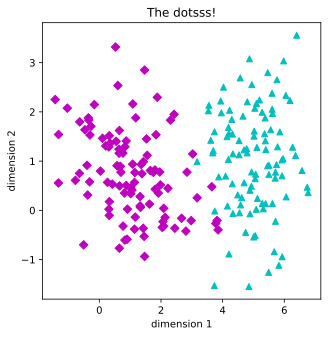

In [2]:
#number of dots in each cluster
nPerClust = 100

#standart deviation,  to control the spread or tightness of the clusters
blur = 1

#This are the center of our cloud of data
A = [1,1]
B = [5,1]

#generate data - random noise based on the center of the cloud
# A[0]+np.random.randn(nPerClust)*blur formará o array para todos os x's randomm à volta de A[0]
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#These labels are used to categorize the data points into their respective clusters
# during training or evaluation of a machine learning model.
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
#np.vstack() stacks the arrays vertically (vertically concatenates them),
# resulting in a single array representing the labels for all data points.
# (nPerClust, 1) ensures that i get a 2D array with a single column.
# Eg: np.zeros((nPerClust,1) means the creation of a array of zeros, with 200 lines and one column

#convert the separate data into a matrix
#np.hstack((a, b)) horizontally stacks the arrays contained in a and b.
#Since a and b are lists of arrays, np.hstack will concatenate these arrays along y, columns: a[0], b[0]; a[1], b[1]
#The resulting array will have a shape of (2, nPerClust * 2)
#The transpose (T) is applied to switch the rows and columns, resulting in a final shape of (nPerClust * 2, 2), each x to its corresponding y, in each row
data_np = np.hstack((a,b)).T

##convert to a pytorch tensor. A PyTorch tensor is a multi-dimensional array or matrix that can store and process numerical data.
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5,5))
#data[np.where(labels == 0)[0], 0]: X-coordinates of data points with label 0; np.where(labels == 0)[0], da os indices dos rows em q isso é true,
# e dps o [:, 0] serve para sacar os x's da data certa
#data[np.where(labels == 0)[0], 1]: Y-coordinates of data points with label 0.
#data[np.where(labels == 1)[0], 0]: X-coordinates of data points with label 1.
#data[np.where(labels == 1)[0], 1]: Y-coordinates of data points with label 1.
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'mD')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'c^')
plt.title('The dotsss!')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

In [3]:
#build the model
Model = nn.Sequential(
    nn.Linear(2,1), #input layer #we have 2 input features, x and y, and one input
    nn.ReLU(), #activation unit
    nn.Linear(1,1), #output unit #the output unit only takes one value from the previous layer and gives one value as output
    nn.Sigmoid(), #final activation unit
)

Model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [4]:
#other model features

learningRate = 0.01

#loss function
lossfun = nn.BCELoss()
#binary cross entropy loss, which is commonly used for binary classification problems.

#optimizer
# SGD works by iteratively updating the parameters in the direction that minimizes the loss function.
#It does so by computing the gradient of the loss with respect to each parameter and adjusting the parameter values accordingly.
#ANNclassify.parameters() provides the parameters (weights and biases) of your neural network to the optimizer, and lr=learningRate specifies the learning rate for the optimizer.
optimizer = torch.optim.SGD(Model.parameters(), lr=learningRate)


In [5]:
#train model
#This sets the number of training epochs. One epoch is a complete pass through the entire dataset during training.
numepochs = 1000
#This initializes a tensor to store the loss values for each epoch. The size of the tensor is determined by numepochs.
losses = torch.zeros(numepochs)

#This starts a loop over the specified number of epochs.
for epochi in range(numepochs):

  #forward pass
  #yHat sao os model's predictions
  yHat = Model(data)

  #compute loss
  #yHat represents the model's predictions, and labels are the true binary labels from the training dataset.
  #The computed loss quantifies how well the model's predictions match the actual labels, providing feedback for the optimization process to adjust the model parameters accordingly.
  loss = lossfun(yHat, labels)
  #isto é so pah ver dps a evolucao das losses
  losses[epochi] = loss

  #backprop- updating parameters
  #optimizer.zero_grad(): This method zeroes out the gradients of all model parameters. It's necessary to do this before computing gradients for a new batch of data.
  optimizer.zero_grad()
  #loss.backward(): This computes gradients of the loss (que surgiu da loss fucntion) with respect to all model parameters using backpropagation.
  loss.backward()
  #optimizer.step(): This updates the model parameters using the computed gradients and the learning rate.
  optimizer.step()

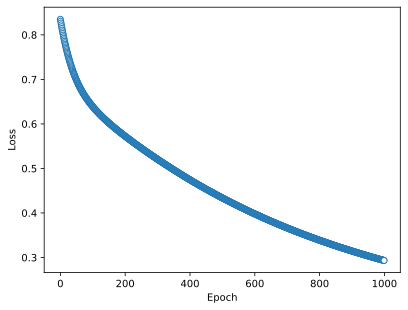

In [6]:
#show the losses

#losses.detach(): This retrieves the training losses stored in the losses tensor.
#.detach() is used to detach the tensor from the computational graph, allowing it to be used in a plotting function outside of PyTorch's computational context.
plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth= 0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [7]:
#Compute the Predictions
predictions = Model(data)
#the final output is the results of the sigmoid function, between 0 and 1. So, we have to label them
#if I want to know the probability of each point, I must print the predictions

predlabels = predictions>0.5
#the prediction label is a boolean where the predictions are higher than 0.5
#Convert 0 and 1 to categories; If the prediction is greater than 0.5, it is classified as 1; otherwise, it is classified as 0.

#find errors
misclassified = np.where(predlabels != labels)[0]
#Find which elements were correctly classified and which were not
#This line compares the predicted labels (predlabels) with the ground truth labels (labels)
#to find misclassified points. The np.where function with the [0] returns the indices where the condition is True.

#total accuracy- is calculated as the percentage of correctly classified points out of the total number of points.
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)

#The printed accuracy indicates how well the model is performing on the training dataset.
print('Final accuracy: %g%%' %totalacc)

Final accuracy: 93.5%


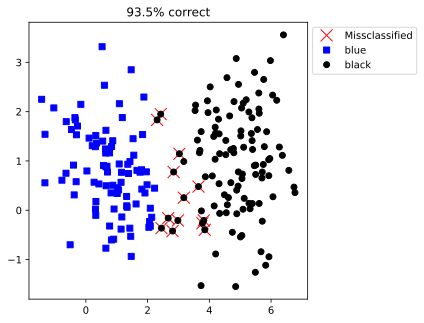

In [8]:
#plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize = 12)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')


plt.legend(['Missclassified', 'blue', 'black'], bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

#Agora com funcoess

In [9]:
#import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-9-57cc3ff34e24>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


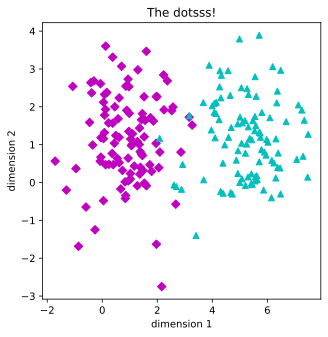

In [10]:
#number of dots in each cluster
nPerClust = 100

#standart deviation,  to control the spread or tightness of the clusters
blur = 1

#This are the center of our cloud of data
A = [1,1]
B = [5,1]

#generate data - random noise based on the center of the cloud
# A[0]+np.random.randn(nPerClust)*blur formará o array para todos os x's randomm à volta de A[0]
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#These labels are used to categorize the data points into their respective clusters
# during training or evaluation of a machine learning model.
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
#np.vstack() stacks the arrays vertically (vertically concatenates them),
# resulting in a single array representing the labels for all data points.
# (nPerClust, 1) ensures that i get a 2D array with a single column.
# Eg: np.zeros((nPerClust,1) means the creation of a array of zeros, with 200 lines and one column

#convert the separate data into a matrix
#np.hstack((a, b)) horizontally stacks the arrays contained in a and b.
#Since a and b are lists of arrays, np.hstack will concatenate these arrays along y, columns: a[0], b[0]; a[1], b[1]
#The resulting array will have a shape of (2, nPerClust * 2)
#The transpose (T) is applied to switch the rows and columns, resulting in a final shape of (nPerClust * 2, 2), each x to its corresponding y, in each row
data_np = np.hstack((a,b)).T

##convert to a pytorch tensor. A PyTorch tensor is a multi-dimensional array or matrix that can store and process numerical data.
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5,5))
#data[np.where(labels == 0)[0], 0]: X-coordinates of data points with label 0; np.where(labels == 0)[0], da os indices dos rows em q isso é true,
# e dps o [:, 0] serve para sacar os x's da data certa
#data[np.where(labels == 0)[0], 1]: Y-coordinates of data points with label 0.
#data[np.where(labels == 1)[0], 0]: X-coordinates of data points with label 1.
#data[np.where(labels == 1)[0], 1]: Y-coordinates of data points with label 1.
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'mD')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'c^')
plt.title('The dotsss!')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

In [11]:
def createANNmodel(learningRate):

  #model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,1), #input layer #we have 2 input features, x and y, and one input
      nn.ReLU(), #activation unit
      nn.Linear(1,1), #output unit #the output unit only takes one value from the previous layer and gives one value as output
      #nn.Sigmoid(), #not need beacuse we are using the BCE with logist loss for loss function
  )
  #loss function
  #BCEWithLogitsLoss combines the sigmoid activation and binary cross-entropy loss.
  # It expects raw predictions as input, rather than probabilities (between zero and one that the sigmoid function gives us).
  lossfun = nn.BCEWithLogitsLoss()

  #optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  #model output
  return ANNclassify, lossfun, optimizer

In [12]:
#A function that trains the model

#fixed parameter
numepochs = 1000

def trainModel(ANNmodel):

  #initiate losses
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):

    #forward pass
    yHat = ANNmodel(data)

    #compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  #final foward pass
  predictions = ANNmodel(data)

  #compute the +redictions and report accuracy
  #Note: shouldn't it be predictions >0.5?? The center of the sigmoid function is 0.5, however we are using BCE with logits that internally computes it. Therefore the actual output of the model is the output of the linear function
  totalacc = 100*torch.mean(((predictions>0) == labels).float())
  #The test of the predictions that are higher than zero are equal to the labels is going to give me a vector of booleans, for true and falses
  #Then the mean, the average of those true and falses are calculate to give us the percentage

  return losses, predictions, totalacc

#Test the functions

Final accuracy: 53%


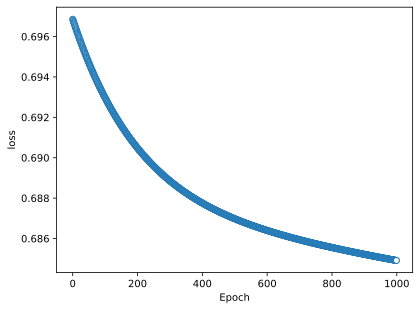

In [13]:
#create everything
ANNclassify,lossfun,optimizer = createANNmodel(0.01)

#run it
losses,predictions,totalacc = trainModel(ANNclassify)

#report accuracy
print('Final accuracy: %g%%' %totalacc)

#show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch'), plt.ylabel('loss')
plt.show()

#experimento de learning rates

> Adicionar blockquote



In [14]:
#set the range of learning rates
learningrates = np.linspace(0.001, 0.1, 40)

#initialize output results
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

#loop thorugh learning rates
for i,lr in enumerate(learningrates):

    #create and run the model
    ANNclassify,lossfun,optimizer = createANNmodel(lr)

    #run it
    losses,predictions,totalacc = trainModel(ANNclassify)

    #store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()


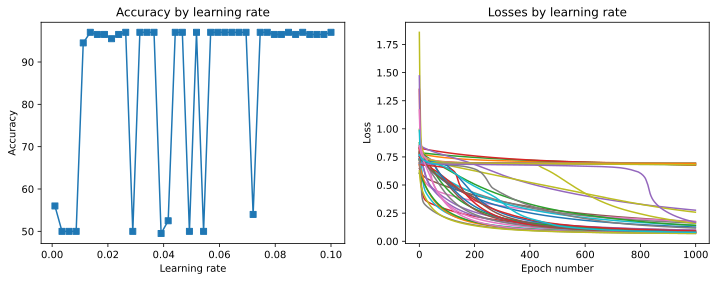

array([[0.69249529, 0.78023642, 0.78707278, ..., 0.73173523, 0.62611955,
        0.76956093],
       [0.69248551, 0.77964282, 0.78681296, ..., 0.70355338, 0.59624112,
        0.76453787],
       [0.69247556, 0.77905518, 0.7865538 , ..., 0.66996306, 0.56880629,
        0.76000512],
       ...,
       [0.68242049, 0.68231475, 0.67789161, ..., 0.06960641, 0.06913623,
        0.07910402],
       [0.68241012, 0.68220001, 0.67782921, ..., 0.06959166, 0.06912266,
        0.07906974],
       [0.68239975, 0.68208444, 0.67776674, ..., 0.06957694, 0.06910917,
        0.07903557]])

In [16]:
#plot the labeled data
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learning rate')


plt.show()